# Classifying Dog and Cat using CNN on Tensorflow 2.x

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

In [ ]:
## Transfer Learning: Plug and play
## transfer learning: finetune to need

Recap: last session:
Convolutional neural networks: [CNN]
ANN -slp, mlp
CNN's have three layers: convolutional layer, relu layer, pooling layer
conv>relu>conv>relu>maxpooling>conv>relu>flatten>output layer [None, no.of classes]

dataset, cat and dog dataset: dropbox
load the dataset, data augmentation techniques

implement convolutional neural networks on a cat and dog

#### Read dataset
#### Reshape all the images to same pixel size
#### 150x150 : Cat and Dog
#### 150x150x3 [ color image] -


#### learning: MLP, CNN, Demo on CNN, RCNN and transfer learning

##Problem Statement

**Dataset:** The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat, images [color] are of different sizes
<br>
It was only effectively addressed in the last few years using deep learning convolutional neural networks. While the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification

cat and dog images are of different sizes/pixels




####**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop convolutional neural network model for classifying the images or Dog Vs cat
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layers check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy


####**Dataset Description**



The **Dog Vs Cat** image classification dataset consists of 8005 images belonging to 2 classes for training images and 2023 images belonging to 2 classes for testing images


1.   Class I = Dog
2.   Class II= Cat

![alt text](https://imgur.com/d8Qd1hD.gif)


####**Skills Gained**

 TensorFlow 2.x
- Convolutional neural network implementation
- Model Improvisation
- Model Save
- Load the pretrained model


# Solution: Classifying Dog and Cat using CNN on Tensorflow 2.x

##Pre-process  the Dataset


#####<b>Before start coding please enable your GPU





![alt text](https://i.imgur.com/QGIPBWR.png)

#### <b> Load the  Dataset

In [ ]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2023-04-22 15:56:22--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2023-04-22 15:56:24--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5db60dc1e4eb0294ca56a659d3.dl.dropboxusercontent.com/cd/0/inline/B6rnQQEjUK30ffFgt64LxmbobGfRMl2uIfSrDeTSXtT99ENXmhtJrsS_r_i9eWCoN70Wt8-pIlmwmZP2F1jVyKQ027f1I-0JdGsor-Dvtm-GJQcfzID7hAcFidDLkUjZMZqwftU7OHlCn9r3WnqgouoDvHtMPhMKh1Cof6lAV5GN9A/file# [following]
--2023-04-22 15:56:25--  https://uc5db60dc1e4eb0294ca56a659d3.dl.dropboxusercontent.com/cd/0/inline/B6rnQQEjUK30ffFgt64LxmbobGfRMl2uIfSrDeTSXtT99ENXmhtJrsS_r_i9eWCoN

#### <b> Unzip the  Data

In [ ]:
!unzip training_set.zip
!unzip test_set.zip

In [ ]:
# downloading the data and unzipping the data

In [ ]:
## Transfer Learning plug and play
! pip install transformers

In [ ]:
!pip install datasets

In [ ]:
# classifying cat and dog
# pretrained model - Huggingface website -

In [ ]:
from transformers import AutoImageProcessor, ResNetForImageClassification
import torch
from datasets import load_dataset
from tensorflow.keras.preprocessing import image
import numpy as np
dataset = load_dataset("huggingface/cats-image")
image1 = dataset["test"]["image"][0]
img_pred = image.load_img("/content/training_set/training_set/cats/cat.1424.jpg",target_size=(150,150))
image1 = 'training_set/training_set/dogs/dog.999.jpg'
#img_pred=image.img_to_array(image)
# img_pred=np.expand_dims(img_pred, axis=0) #[1,150,150,3]
processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")
inputs = processor(img_pred, return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits
# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

  0%|          | 0/1 [00:00<?, ?it/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Persian cat


#### <b> Visualize the  Data

Populating the interactive namespace from numpy and matplotlib


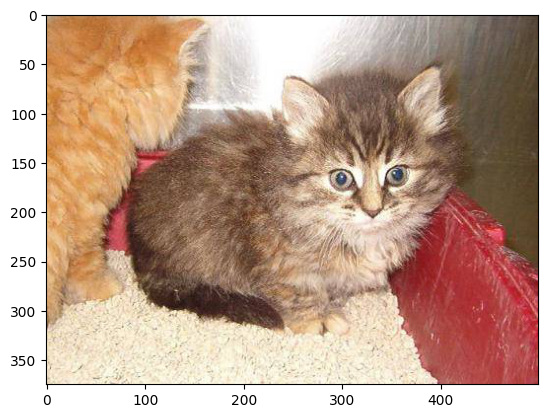

In [ ]:
#print the ouput inline in jupyter notebook
%pylab inline
import matplotlib.pyplot as plt #plotting
import matplotlib.image as mpimg #image processing
img=mpimg.imread('/content/training_set/training_set/cats/cat.1424.jpg')
imgplot = plt.imshow(img)
plt.show()


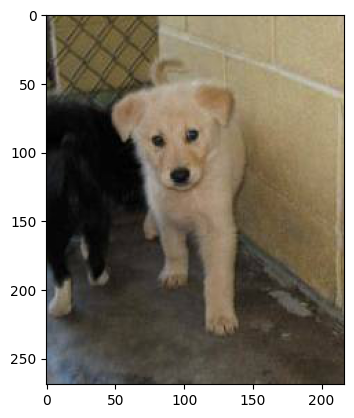

In [ ]:
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4033.jpg')
imgplot = plt.imshow(img)
plt.show()

# different dimension./May be the dimention: RESIZE THE IMAGES TO SAME DIMENSIONS
## we find cat and dog, but there are many noises like cushions, walls irrelavant details.
## Different features: may be object size: zoom the images

##  Import Libraries

Problem statement: Classify cat and dog images in to cat and dog

1. Import
2. read data
3. split the data in to x and y
4. Data augmentation techniques
5. Split the data in to training and testing
6. training data in to CNN
7. test the data using trained model



In [ ]:
import tensorflow #2.X
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#preprocessing: resize the image, generate more images from given images, Zoom the images,
from tensorflow.keras.models import Sequential #type of model for coding
from tensorflow.keras.layers import Conv2D,Activation, MaxPooling2D, Flatten, Dense,Dropout #Dense :Fully connected
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #PLOTTING
import matplotlib.image as mpimg #reading

#####Check the TensorFlow version

In [ ]:
print(tensorflow.__version__)

2.11.0


## Designing the Model

#### <b> Initialize the parameters

In [ ]:
img_width, img_height = 150,150  #width and height of the images
#/content/training_set
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample =100 #Preprocessing
nb_validation_samples =100
epochs =20
batch_size= 32 #model training

#### <b> Check the shape of the image

Two ways to  to represent the image data as a three dimensional array

1. <b>  Channels Last:<b> Image data is represented in a three-dimensional array where the last channel represents the color channels, e.g. [rows][cols][channels].

2.  <b> Channels First:<b> Image data is represented in a three-dimensional array where the first channel represents the color channels, e.g. [channels][rows][cols].


#### color image: 3 [RGB] 28X28X3; 3X28X28 [0 to 255]
#### height x width x no_channels [RGB]

In [ ]:
import tensorflow.keras.backend as k
#150x150x3
#img width, img height, no.of channels -- backend is configured
#3,150,150, #RGB - channels - RGB layer [R,G,B]
# 150x150x3 [rgb]
if k.image_data_format()=='channels_first': #3x150x150:
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)


3X150X150
150X150X3



#### <b> Generate Images to train the model



1.   Rescale
2.   Shear_range
3.   Zoom_range
4.  Horizontal_flip

![alt text](https://i.imgur.com/Az24gjL.png)


- This class allows to configure random transformations and normalization on the allocated image during training time
- Prevents overfitting and helps to generate a generalize model
- Never repeats the exact same images twice  to train our model




In [ ]:
help(ImageDataGenerator)

In [ ]:
train_datagen=ImageDataGenerator(rescale=1. /255, # normalize our input data
                                 shear_range =0.05, # tilting the image by an angle
                                 zoom_range=0.2,
                                 horizontal_flip = True)
test_datagen=ImageDataGenerator(rescale=1. /255)
train_generator =train_datagen.flow_from_directory(train_data_dir,
                                                   target_size =(img_width,img_height),
                                                   batch_size=batch_size,
                                                   class_mode='binary',
                                                   classes=['cats','dogs'])
#Now this, will generate training generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 32 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)
validation_generator =test_datagen.flow_from_directory(validation_data_dir,
                                                       target_size =(img_width,img_height),
                                                       batch_size=batch_size,
                                                       class_mode='binary')
#Now, this will generate testing generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)




Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


####**Visual Representation of ImageDataGenerator**

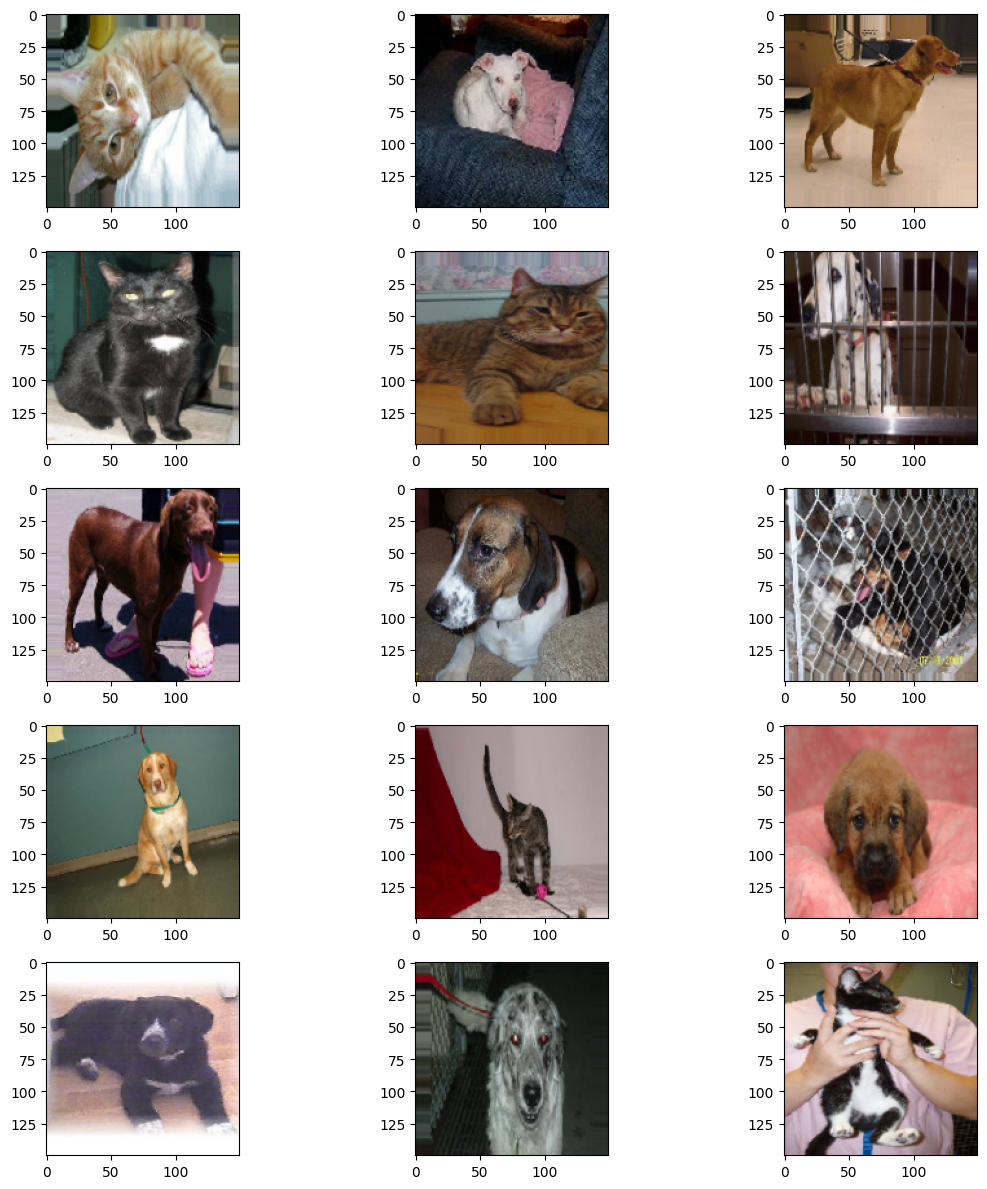

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### <b> Build the basic CNN model 0

####<b> Layers in CNN:


<b>

1.   Convolutional Layer
2.   ReLu
3. Pooling Layer
4. Fully Connected Layer (Dense)


![alt text](https://i.imgur.com/P4yvxRW.png)

![alt text](https://i.imgur.com/a2vSxQW.png)


- Adding convolutional neural network in the model
- add() - Helps to add layers in the model
- Conv2D() - Convolutional layer (to extract features from the images)
- Conv2D(32,(3,3),input_shape=input_shape)
  - 32 - Take 32 features from the given image
  - (3,3) - Metrics size of the images(3*3)
  - input_shape = image size

- Activation function (relu) is added to remove the negative values


In [ ]:
help(Conv2D)

In [ ]:
model = Sequential() # sequential composition
# add a layer: Dense, Dropout, activation and cnn work better for images
model.add(Conv2D(16,(3,3),input_shape=input_shape)) #32 filters of size 3 width and 3 height
# convolutional layers - with 16 filters of 3 height and 3 width
#This class allows to create convolutional neural network to extract feature from the images
#INPUT: 150X150
#CONV: 16 filters, 3X3
# Output: 148x148x16
## Theory:
#INPUT: 9x9
# conv: 3 filters, 3x3
# output: 7x7x3
model.add(Activation('relu')) #148x148x32
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling2D helps to reduce the size of the data,
#7x7x3 __ mp__ output: 4x4x3
#16x16x5 __mp__ output: 8x8x5
####### ######
#148x148x16 __mp__ output: 74x74x16
model.add(Flatten())#Converts multi dimensional array to 1D channel
model.add(Dense(1024)) #1024 neurons
#Numbers of output nodes in the hidden layer
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1)) #output layer #cat -0, dog - 1
model.add(Activation('sigmoid')) #sigmoid activation function
model.summary()
#If there are 3 classification the will it be model.Dense(3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 activation (Activation)     (None, 148, 148, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 1024)              89719808  
                                                                 
 activation_1 (Activation)   (None, 1024)              0         
                                                        

#### <b> Compile the basic CNN model

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

# 2 classes, binary_crossentropy, sigmoid activation is used
# more than 2, categorical_crossentropy, softmax is used

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 activation (Activation)     (None, 148, 148, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 1024)              89719808  
                                                                 
 activation_1 (Activation)   (None, 1024)              0         
                                                        

#### <b> Fit the basic CNN model

In [ ]:
training = model.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=5,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 1.1233 - accuracy: 0.5009

100/100 [==============================] - 41s 305ms/step - loss: 1.1233 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 2/5
100/100 [==============================] - 24s 238ms/step - loss: 0.6932 - accuracy: 0.5036
Epoch 3/5
100/100 [==============================] - 23s 235ms/step - loss: 0.6930 - accuracy: 0.4995
Epoch 4/5
100/100 [==============================] - 24s 238ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5/5
100/100 [==============================] - 23s 232ms/step - loss: 0.6931 - accuracy: 0.5090


#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


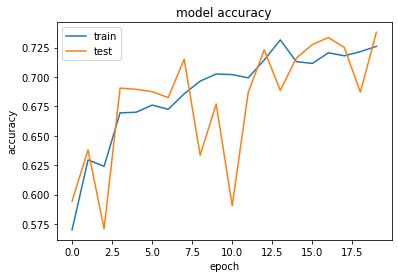

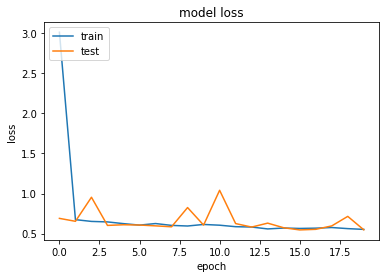

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


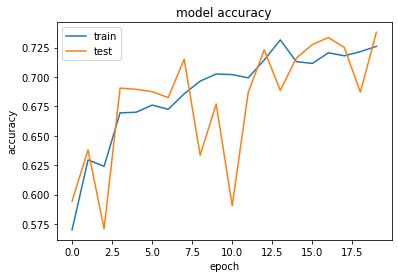

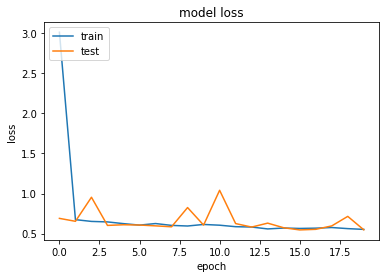

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


1/1 [==============================] - 0s 26ms/step
[[1.]]
Prediction:  Dog


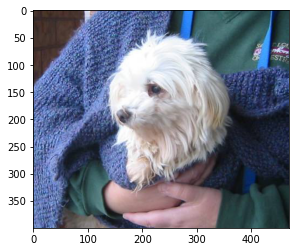

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4333.jpg",target_size=(150,150))

#cnvert the image to array
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0) #[1,150,150,3]

rslt = model.predict(img_pred)
print(rslt)
#alphabetical: cat : 0, dog is 1 [1]
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4333.jpg')
imgplot = plt.imshow(img)
plt.show()


####<b> Predict the image


[[1.]]
Prediction:  Dog


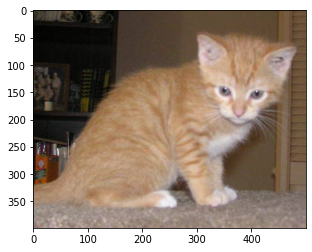

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 1

####<b> Let's add add some layers to prevent ovetfitting


**Dropout:** used to deactive some neurons randomly to prevent overfitting
<br>
**Early Stop:**
To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
<br>
**Learning Rate Reduction:**
We will reduce the learning rate when then accuracy not increase for 2 steps
- monitor: quantity to be monitored.
- factor: factor by which the learning rate will be reduced. new_lr = lr * factor
- patience: number of epochs with no improvement after which learning rate will be reduced.
- verbose: int. 0: quiet, 1: update messages.
- mode: one of {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; in max mode it will be reduced when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.
- min_delta: threshold for measuring the new optimum, to only focus on significant changes.
- cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
- min_lr: lower bound on the learning rate.



#### 500 epochs:
10th epoch, model train accuracy: 90%,  validation accuracy: 90%
30th epoch: training ac: 95%, validation accuracy: 90% [overfitting]
50th epoch: training ac: 99.9% valication accu: 87% [overfitting]

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=2) # wait for 2 epochs, validation accuracy is not improving than consider stop the training

# if training accuracy is less than validation accuracy: underfitting
# if training accuracy is more than validation accuracy: overfitting
# if training accuracy is around  validation accuracy: appropriate

# e1: va: 68% ta: 64%
#e2: va: 74.2%. ta: 74% ##stop here
#e3: va: 73.8%.  ta: 78%
#e4: va: 73%.  ta: 79% ##
#e5: va: 69.9% ta: 80%
#e6: va:

# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving 0.01 - 0.5*0.01 == 0.01/2
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

#0.001*0.5 = 0.00001
# overfitting: a mechanism where the training accuracy is higher than validation accuracy

callbacks = [earlystop, learning_rate_reduction]

# conv block: 50%
model1 = Sequential()
# model1 = Sequential()
model1.add(Conv2D(32,(3,3),input_shape=input_shape)) #32 neurons with 3*3 filter
model1.add(Activation('relu'))
#### added a conv layer
model1.add(Conv2D(64,(3,3)))
 #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
## second block
model1.add(Conv2D(64,(3,3),input_shape=input_shape)) #32 neurons with 3*3 filter
model1.add(Activation('relu'))
#### added a conv layer
model1.add(Conv2D(128,(3,3)))
 #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(512)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(Dropout(0.3))#Prevents overfitting of the model and it has the effect of reducing the capacity or thinning the network during training
model1.add(Dense(1)) #output layer
model1.add(Activation('sigmoid')) #sigmoid activation function
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_16 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 activation_17 (Activation)  (None, 146, 146, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                      

#### <b> Compile the basic CNN model1

In [ ]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_16 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 activation_17 (Activation)  (None, 146, 146, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                      

#### <b> Fit the basic CNN model1

In [ ]:
nb_train_sample =8
nb_validation_samples =4
training = model1.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=30,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/30
8/8 [==============================] - 8s 320ms/step - loss: 0.6989 - accuracy: 0.5039 - val_loss: 0.6924 - val_accuracy: 0.5234 - lr: 0.0010
Epoch 2/30
8/8 [==============================] - 3s 319ms/step - loss: 0.6933 - accuracy: 0.5352 - val_loss: 0.6996 - val_accuracy: 0.4766 - lr: 0.0010
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
8/8 [==============================] - 3s 318ms/step - loss: 0.6915 - accuracy: 0.5312 - val_loss: 0.7030 - val_accuracy: 0.4219 - lr: 0.0010


#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


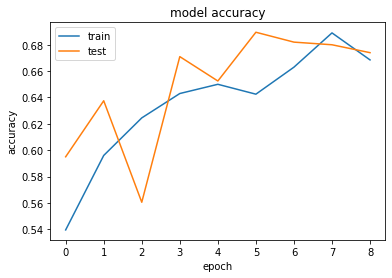

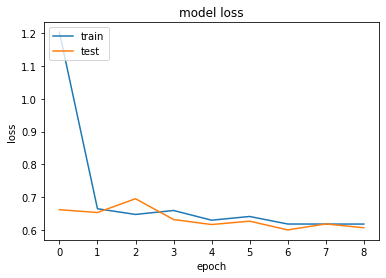

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


[[1.]]
Prediction:  Dog


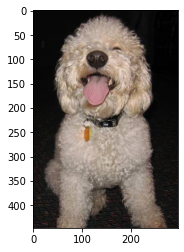

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
### load the image
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))
## convert to an array
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0) # one image at a time

result = model1.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"

# Cat , Dog
# 0,    1
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4032.jpg')
imgplot = plt.imshow(img)
plt.show()


[[1.]]
Prediction:  Dog


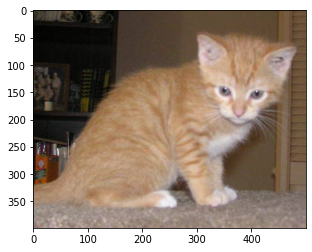

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat" #int('Prediction: ',prediction)
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 2

![alt text](https://i.imgur.com/wpLHgqN.jpg)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Overfitting
earlystop = EarlyStopping(patience=3) # wait for 3 epochs, if validation accuracy is not improving, stop the process
### epochs - 100, 22 - 78%, 23 -74% 24-72% 25 - 70% |||


learning_rate_reduction = ReduceLROnPlateau(monitor='loss',
                                            patience=2, #waiting for 2epochs
                                            verbose=1, #
                                            factor=0.5,
                                            min_lr=0.00001)

######
callbacks = [earlystop, learning_rate_reduction]

model2 = Sequential() #150x150x3
model2.add(Conv2D(32,(3,3),input_shape=input_shape, activation = 'relu')) #148x148x32
#model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model2.add(BatchNormalization()) #148x148x32 #Normalize input data, hidden layers
model2.add(MaxPooling2D(pool_size=(2, 2))) #74x74x32
model2.add(Dropout(0.25)) #74x74x32

model2.add(Conv2D(128, (3, 3), activation='relu')) #74x74x64
model2.add(BatchNormalization()) #
model2.add(MaxPooling2D(pool_size=(2, 2))) #37x37x64
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu')) #74x74x128
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2))) #37x37x128
model2.add(Dropout(0.25))

model2.add(Flatten())  #10000000
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())

model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes

#BINARY LABEL [0-1]





#### <b> Compile the basic CNN model2

In [ ]:
#model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 128)       36992     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 128)     

#### <b> Fit the basic CNN model2

In [ ]:
training = model2.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=20,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - ETA: 0s - loss: 0.9333 - accuracy: 0.5759

100/100 [==============================] - 38s 330ms/step - loss: 0.9333 - accuracy: 0.5759 - val_loss: 0.8046 - val_accuracy: 0.5012 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - ETA: 0s - loss: 0.7538 - accuracy: 0.6139

100/100 [==============================] - 27s 269ms/step - loss: 0.7538 - accuracy: 0.6139 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 0.6860 - accuracy: 0.6527

100/100 [==============================] - 29s 290ms/step - loss: 0.6860 - accuracy: 0.6527 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - ETA: 0s - loss: 0.6156 - accuracy: 0.6928

100/100 [==============================] - 26s 262ms/step - loss: 0.6156 - accuracy: 0.6928 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - ETA: 0s - loss: 0.6144 - accuracy: 0.6899

100/100 [==============================] - 26s 257ms/step - loss: 0.6144 - accuracy: 0.6899 - lr: 0.0010
Epoch 6/20
100/100 [==============================] - ETA: 0s - loss: 0.5547 - accuracy: 0.7194

100/100 [==============================] - 27s 265ms/step - loss: 0.5547 - accuracy: 0.7194 - lr: 0.0010
Epoch 7/20
100/100 [==============================] - ETA: 0s - loss: 0.5417 - accuracy: 0.7350

100/100 [==============================] - 26s 262ms/step - loss: 0.5417 - accuracy: 0.7350 - lr: 0.0010
Epoch 8/20
100/100 [==============================] - ETA: 0s - loss: 0.5327 - accuracy: 0.7381

100/100 [==============================] - 26s 258ms/step - loss: 0.5327 - accuracy: 0.7381 - lr: 0.0010
Epoch 9/20
100/100 [==============================] - ETA: 0s - loss: 0.5228 - accuracy: 0.7397

100/100 [==============================] - 26s 260ms/step - loss: 0.5228 - accuracy: 0.7397 - lr: 0.0010
Epoch 10/20
 99/100 [============================>.] - ETA: 0s - loss: 0.5090 - accuracy: 0.7588

100/100 [==============================] - 28s 282ms/step - loss: 0.5092 - accuracy: 0.7586 - lr: 0.0010
Epoch 11/20
100/100 [==============================] - ETA: 0s - loss: 0.4688 - accuracy: 0.7778

100/100 [==============================] - 26s 261ms/step - loss: 0.4688 - accuracy: 0.7778 - lr: 0.0010
Epoch 12/20
100/100 [==============================] - ETA: 0s - loss: 0.4754 - accuracy: 0.7674

100/100 [==============================] - 26s 257ms/step - loss: 0.4754 - accuracy: 0.7674 - lr: 0.0010
Epoch 13/20
100/100 [==============================] - ETA: 0s - loss: 0.4567 - accuracy: 0.7837

100/100 [==============================] - 33s 327ms/step - loss: 0.4567 - accuracy: 0.7837 - lr: 0.0010
Epoch 14/20
100/100 [==============================] - ETA: 0s - loss: 0.4419 - accuracy: 0.7869

100/100 [==============================] - 30s 301ms/step - loss: 0.4419 - accuracy: 0.7869 - lr: 0.0010
Epoch 15/20
100/100 [==============================] - ETA: 0s - loss: 0.4540 - accuracy: 0.7812

100/100 [==============================] - 30s 296ms/step - loss: 0.4540 - accuracy: 0.7812 - lr: 0.0010
Epoch 16/20
100/100 [==============================] - ETA: 0s - loss: 0.4185 - accuracy: 0.8125

100/100 [==============================] - 28s 283ms/step - loss: 0.4185 - accuracy: 0.8125 - lr: 0.0010
Epoch 17/20
100/100 [==============================] - ETA: 0s - loss: 0.4223 - accuracy: 0.8090

100/100 [==============================] - 27s 274ms/step - loss: 0.4223 - accuracy: 0.8090 - lr: 0.0010
Epoch 18/20
100/100 [==============================] - ETA: 0s - loss: 0.3996 - accuracy: 0.8185

100/100 [==============================] - 26s 255ms/step - loss: 0.3996 - accuracy: 0.8185 - lr: 0.0010
Epoch 19/20
100/100 [==============================] - ETA: 0s - loss: 0.3820 - accuracy: 0.8308

100/100 [==============================] - 26s 263ms/step - loss: 0.3820 - accuracy: 0.8308 - lr: 0.0010
Epoch 20/20
100/100 [==============================] - ETA: 0s - loss: 0.3935 - accuracy: 0.8194

100/100 [==============================] - 26s 254ms/step - loss: 0.3935 - accuracy: 0.8194 - lr: 0.0010


# everything possible using cnn: 72%
# how can i increase this accuracy by another 10 ppts: 82

# answers:
1. more training data
2. A number of slight changes in everything
3. You can use optimization algorithm like PSO
4. increase the filters
5. is there any data drifting check
6. probably understanding more results [done]

# increase the accuracy of the model
# 1. Data
a. probably understanding more results, gather the image where it went wrong or right [data drifting] - Error analysis
b. more training data - client
c. data augmentation techniques - create more data
# 2. Model results
a. Hyper parameter tuning: A number of slight changes in everything, You can use optimization algorithm like PSO, increase the filters
b. change in the model: similar problems [classification algorithms]
c. Transfer Learning: transfer of learning from a pretrained model to our model:
1. client - 1000 rows of text data, 16 classes - 70% - 75%
2. BERT - pretrained model [3.4B words, 33K uniqu] - pretrained model - fine tune the model to your need - 85%
## increase accuracy - 1000 rows, 6000 words,
## excellent, fantastic [0]
## teacher  - share knowlegde - dataset

History: 2011, ILSVRC [Image large scale visual recognition challenge] -imagenet [50000 images across 100 classes], coco datasets -
d. Transfer learning and RCNN: conv -
a. 2011: Alexnet: [Conv - ReLU] - 9 layer CNN -  70%,
1a. it avoids vanishing gradient problem [loss, we use the loss to modify a set of weights] w' = w+delta(w) [2+0.00001] , 9 layer network, better accuracy
1b. outsourced our model weights. [transfer learning]
1c. your dataset matches with pretrained model's dataset. [pretrained model]
1d. cat, dog: pretrained model [trained on road, traffic and automobile data]

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


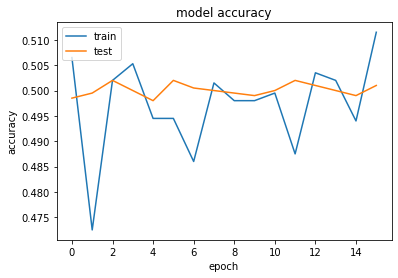

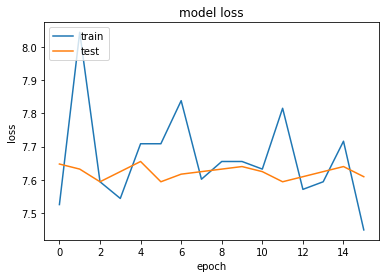

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


[[1.]]
Prediction:  Dog


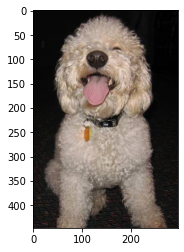

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model2.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


In [ ]:
# read the data
# preprocessing - scaling, resizing, data augmentation
# datagenerator to slice data in to batches
# model fitting using,
# monitor validation accuracy
# Hyper parameter tuning: model [modifying layers, changing optimizers, activation, number of nodes/filters],
# output: Callbacks - EarlyStopping - 100 epochs, 10 epochs, ReduceLRonPleateau
# to prevent overfitting: Regularization techniques: dropOut, BatchNormalization
# model save
# reuse the model for new data

In [ ]:
## Transfer learning approaches
## dataset | available transfer learning models


## dataset [bigger] - domain -transfer learning [medical, dataset] - train - Best - model layers
## dataset[smaller]  - domain [medical - same] -  transfer learnng - last layers -
## dataset [smaller/bigger] -  no pertrained model [same domain] - use thier/ architecture -

## data - Model [PTM] - fine tune
## segmentation -

[[1.]]
Prediction:  Dog


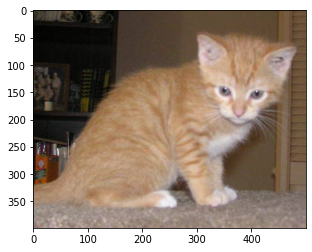

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


rslt = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


####Freeze the model

In [ ]:
import json
from keras.models import model_from_json #saving the model
from keras.models import load_model #loading the saved model
from keras.preprocessing import image #image processing
import numpy as np #numpy

# serialize model to JSON
#model_json = model.to_json()
#model2 = Sequential()

model_json = model2.to_json() #save the model as json
with open("model2.json", "w") as json_file:
    json_file.write(model_json) #architecture of the model - 150x150--64,


####
model2.save_weights('first_try.h5')
print("[INFO] Saved model to disk")


[INFO] Saved model to disk


In [ ]:
import os
os.getcwd()

'/content'

#### Load the model

Loaded model from disk
[[0]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[1.]]
Prediction:  Dog


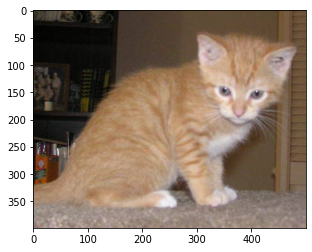

In [ ]:
# load json and create model
## INFERENCE -
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("first_try.h5")
print("Loaded model from disk")
# load the model we saved
#model=load_model("kwhFinal.h5")

# predicting images
img = image.load_img(r"/content/training_set/training_set/cats/cat.1.jpg", target_size=(img_width, img_height))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) #use it if only on image

clas = loaded_model.predict_classes(x)
print(clas)
clas = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1: #c , d -0, 1
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

### <b> Build CNN model 3 using VGG16 pretrained model

In [ ]:
### VGG16 [animals, ]
### Pretraining
## Our input - CAT/DOG IMAGE
## Input: 224*224*3
## Output: 4096

#### Fine-tune to our need
## (None, 4096).(4096,512) = (None,512)
## (None,512).(512,1) = (512,1)

## cat, dog [2]
## 1 [binary- sigmoid]

![alt text](https://i.imgur.com/EyeXqiB.png)

In [ ]:
from keras.applications import VGG16

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16 #imprting other model like vgg16
from keras.models import Model
image_size = 150
input_shape = (image_size, image_size, 3)
epochs = 20
batch_size = 16
###
pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet") # include_top=False,4096
for layer in pre_trained_model.layers[:15]: #first 15
    layer.trainable = False ## fine tune your model - backprogate  your number of layers [3 layers]

# for layer in pre_trained_model.layers[15:]:
#     layer.trainable = True ## fine tune your model - backprogate 15 layers [vgg16] + your number of layers [18 layers]

last_layer = pre_trained_model.get_layer('block5_pool') #8192
last_output = last_layer.output #8192 nodes #(None,4,4,512)
# pretrained model output
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output) #8192 - 4096 - (None,2,2,512) - 4096 - big long vector
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
## model.add(Dense(512), activation="relu")
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model3 = Model(pre_trained_model.input, x)



In [ ]:
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

#### <b> Compile the basic CNN model3

In [ ]:
model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-2, momentum=0.9),
              metrics=['accuracy'])

model3.summary()



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

#### <b> Fit the basic CNN model3

In [ ]:
training = model3.fit_generator(train_generator,
                   steps_per_epoch=16,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=8)

<ipython-input-37-42a92dffdbcf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model3.fit_generator(train_generator,


Epoch 1/20
16/16 [==============================] - 7s 332ms/step - loss: 0.6606 - accuracy: 0.6094 - val_loss: 0.4195 - val_accuracy: 0.8125
Epoch 2/20
16/16 [==============================] - 5s 329ms/step - loss: 0.5563 - accuracy: 0.7168 - val_loss: 0.4882 - val_accuracy: 0.7852
Epoch 3/20
16/16 [==============================] - 6s 354ms/step - loss: 0.4430 - accuracy: 0.8184 - val_loss: 0.3185 - val_accuracy: 0.8711
Epoch 4/20
16/16 [==============================] - 5s 331ms/step - loss: 0.5110 - accuracy: 0.8242 - val_loss: 0.4833 - val_accuracy: 0.8320
Epoch 5/20
16/16 [==============================] - 6s 384ms/step - loss: 0.5381 - accuracy: 0.7285 - val_loss: 0.4388 - val_accuracy: 0.8281
Epoch 6/20
16/16 [==============================] - 7s 455ms/step - loss: 0.4011 - accuracy: 0.8457 - val_loss: 0.2442 - val_accuracy: 0.8984
Epoch 7/20
16/16 [==============================] - 5s 327ms/step - loss: 0.4377 - accuracy: 0.8066 - val_loss: 0.2649 - val_accuracy: 0.8906
Epoch 

In [ ]:
## from sklearn.metrics import confusion_matrix, precision_score, recall_score


confusion_matrx(y_true,y_pred)

#### <b> Find the accuracy score


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model3.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4006.jpg')
imgplot = plt.imshow(img)
plt.show()


In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model3.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


In [ ]:
# Transfer Learning: Plug and Play mode
! pip install transformers

**After using the pre-trained model our model is successfully identified all the images with high accuracy**

# DIY: Assignment

####**Total Marks: 50**
**Duration: 6 days**

As a part of this assignment following are the list of task that may help  improve your skills with CNN and TensorFlow. It is important to get hands-on experience with CNN in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.


###**`.ipynb file 1`**


**Marks: 10**
> - Do you get the exact same results if you run the Notebook multiple times without changing any parameters?
- What is the effect of adding more neurons to each Conv2D layer?
- What happens if we manipulate the value of dropout?
- What is the effect of adding more activation layers to the network?
- What is the accuracy score if we use more dense layers in the model?
- Does manipulating the learning rate affect the model? Justify your answer.


###**`.ipynb file 2`**


**Marks: 15**
>- Try improving the model and re-code the program from scratch without looking too much at this source-code.
>- Add more Dense and Conv2D layers in the network
>- Try to use Different activation function
>- Increase the number of epochs to achieve high accuracy
>- Try to play with learning rate to understand the concept
- Write up a summary explaining how your program works.


###**`.ipynb file 3`**



**Marks: 25**
>**Problem Statement**<br>
The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).<br>
<br>
**Dataset Description**
- **Total Images**: The dataset consists of 28,709 examples
<br>
- Fer2013.csv  contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image.
- Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

![alt text](https://i.imgur.com/lGvw0Bq.png)



>**Tasks to be Performed:**
As a part of this assignment you will be performing the following tasks:
- Prepare a detailed python notebook(similar to this one) using convolutional neural network for classifing the images from [Fer.csv](https://www.kaggle.com/deadskull7/fer2013) with best accuracy
- Prepare the dataset for the model
- Reshape and Normalize the data:
<br>
<b>Hint:</b><br>
•	Split pixels by space to get columns
•	reshape the input image (48,  48 ,1)<br>
•	change the type of data to float32

- Normalize & Train_Test Split
<br>
<b>Hint:</b><br>
•	Normalize the data by dividing with 255<br>
•	Split data into train and test (90,10)

<b> Define CNN Model: </b>
- •	Layer 1<br>
•	2 Conv2d with 64 filters of 5,5 filter <br>
•	BatchNormalization layer<br>
•	Max Pooling layer with 2,2 <br>
•	Activation relu <br>
- •	Layer 2<br>
•	2 Conv2d with 128 filters of 5,5 filter <br>
•	BatchNormalization layer<br>
•	Max Pooling layer with 2,2 <br>
•	Activation relu<br>
- •	Layer 3<br>
•	2 Conv2d with 256 filters of 3,3 filter<br>
•	BatchNormalization layer<br>
•	Max Pooling layer with 2,2 <br>
•	Activation relu<br>
- •	Layer 4<br>
•	Flatten layer <br>
•	Dense Layer with 128 Neuron <br>
•	BatchNormalization<br>
•	Activation Relu <br>
•	Dropout 0.25 <br>
•	Dense 7 neurons with Softmax <br>
•	Loss: Categorical cross-entropy <br>
•	Optimizer: Adam <br>


**Answer:** What parameters should be choosen to get best accuracy on classifying the images into various categories?